## **Library**

# **Proyek Pertama: Menyelesaikan Permasalahan departemen HR di Perusahaan Jaya Jaya Maju**

**Nama: Windi Sri Rahayu**

**Email: windyraayu45@gmail.com**

**Id Dicoding: ayuuwindii**

# **Persiapan**

**Menyiapkan library yang dibutuhkan**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Menyiapkan data yang akan digunakan

**Data Understanding**

In [2]:
# 1. Load dataset langsung dari raw GitHub URL
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"
df = pd.read_csv(url)

# 2. Tampilkan 5 baris pertama
print(df.head())

# 3. Ringkasan data
print("\nInfo Dataset:")
print(df.info())

# 4. Cek missing values
print("\nMissing Values per Kolom:")
print(df.isnull().sum())

# 5. Distribusi Attrition (persentase)
print("\nDistribusi Attrition (%):")
print(df['Attrition'].value_counts(normalize=True) * 100)


   EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        NaN  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        NaN      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         2            80   
1              1  ...                         1     

**Data Preparation / Preprocessing**

In [3]:
# Drop rows dengan missing values di kolom 'Attrition'
df_clean = df.dropna(subset=['Attrition'])
df_clean.to_csv('cleaned_data.csv', index=False)
# Cek data setelah dibersihkan
print(df_clean['Attrition'].isnull().sum())  # Pastikan tidak ada missing values lagi
print(df_clean.isnull().sum())
print(df_clean.head())

0
EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSin

# **EDA**

<ipython-input-4-13063174fda3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df_clean, palette='Set2')


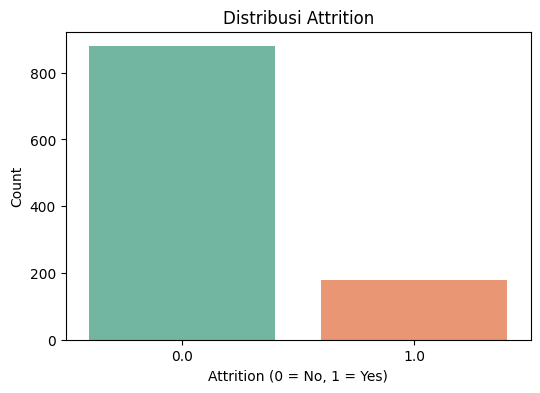

In [4]:
# Visualisasi distribusi Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df_clean, palette='Set2')
plt.title('Distribusi Attrition')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


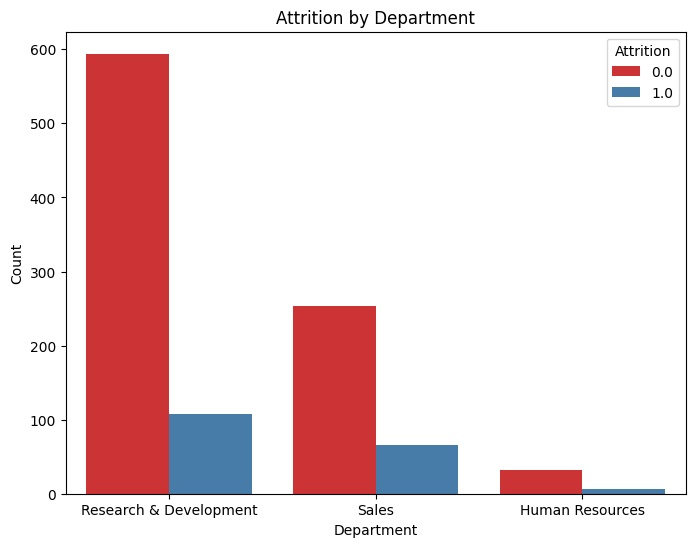

In [6]:
# Attrition by Department
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', hue='Attrition', data=df_clean, palette='Set1')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


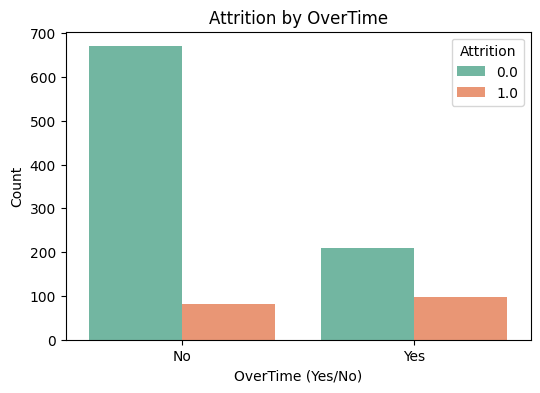

In [8]:
# Attrition by OverTime
plt.figure(figsize=(6, 4))
sns.countplot(x='OverTime', hue='Attrition', data=df_clean, palette='Set2')
plt.title('Attrition by OverTime')
plt.xlabel('OverTime (Yes/No)')
plt.ylabel('Count')
plt.show()


<ipython-input-7-c298f90be141>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_clean, palette='Set2')


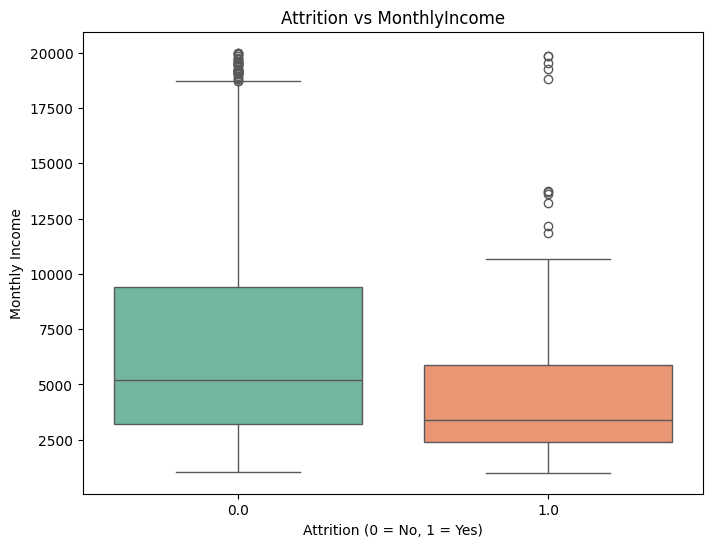

In [7]:
# Boxplot Attrition vs MonthlyIncome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_clean, palette='Set2')
plt.title('Attrition vs MonthlyIncome')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Monthly Income')
plt.show()


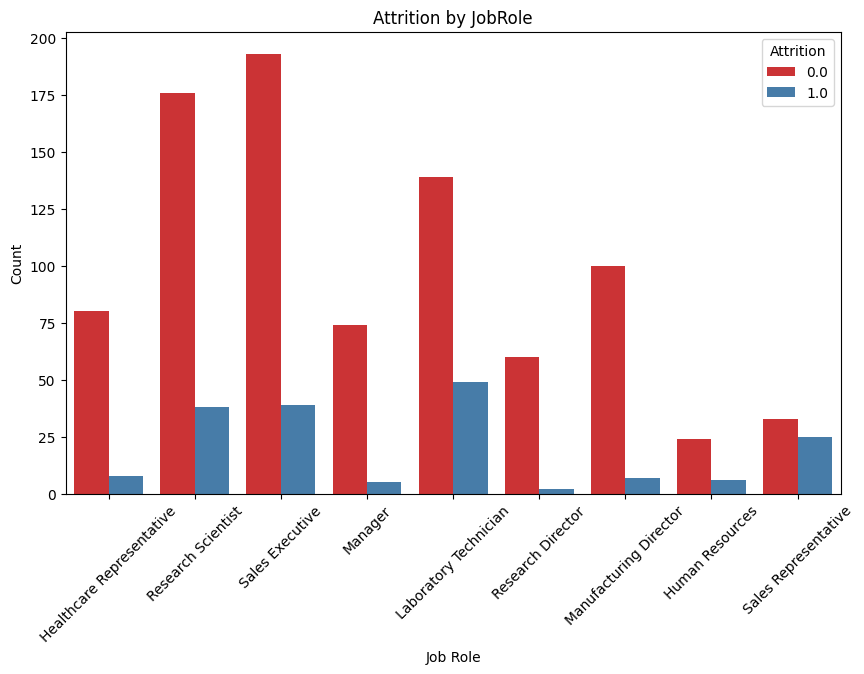

In [9]:
# Attrition by JobRole
plt.figure(figsize=(10, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df_clean, palette='Set1')
plt.title('Attrition by JobRole')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


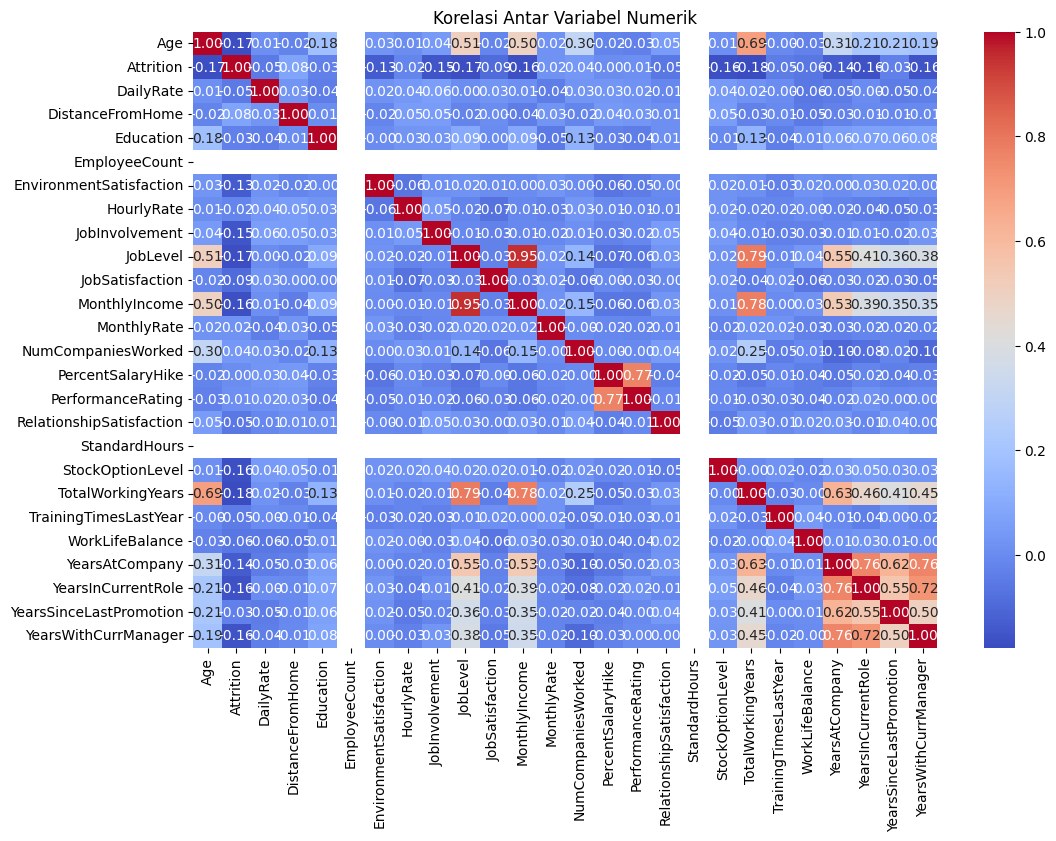

In [10]:
# 1. Pilih kolom numerik (int64 / float64) saja, dan kecuali EmployeeId
num_df = df_clean.select_dtypes(include=['int64', 'float64']).drop(columns=['EmployeeId'])

# 2. Hitung korelasi
corr = num_df.corr()

# 3. Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

# **Modeling**

In [11]:

# Encode categorical features
le = LabelEncoder()
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = le.fit_transform(df_clean[col])

# Features and target
X = df_clean.drop(columns=['Attrition', 'EmployeeId'])
y = df_clean['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)

<ipython-input-11-33b7f339851a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
<ipython-input-11-33b7f339851a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
<ipython-input-11-33b7f339851a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       173
         1.0       0.61      0.36      0.45        39

    accuracy                           0.84       212
   macro avg       0.74      0.65      0.68       212
weighted avg       0.82      0.84      0.82       212

Accuracy: 0.839622641509434
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**10 parameter pendukung prediksi karyawan leave atau stay**

                    Feature  Importance
25         StockOptionLevel    0.072745
14          JobSatisfaction    0.059302
16            MonthlyIncome    0.052265
32     YearsWithCurrManager    0.051537
8   EnvironmentSatisfaction    0.049634
11           JobInvolvement    0.046528
26        TotalWorkingYears    0.045859
17              MonthlyRate    0.044690
0                       Age    0.044586
10               HourlyRate    0.043765


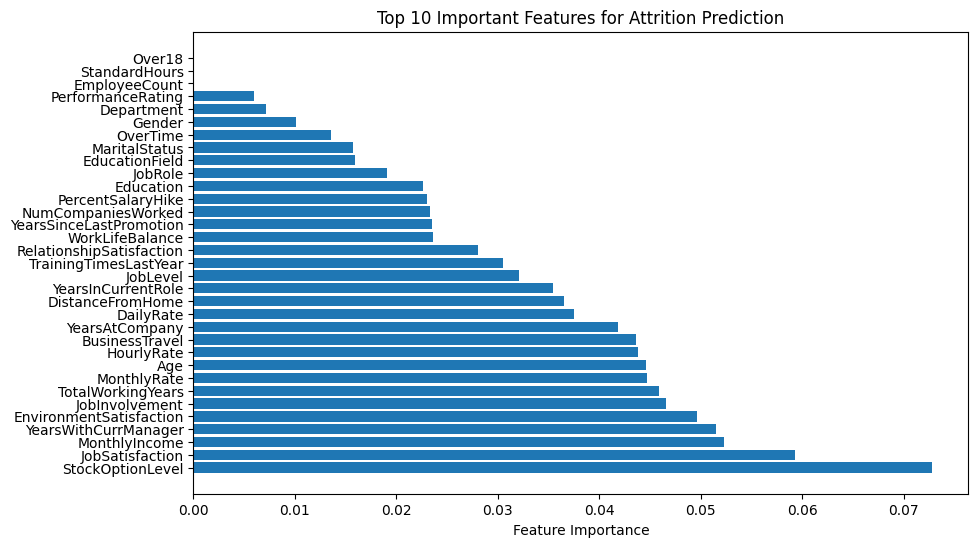

In [12]:
# Menampilkan feature importance
importances = best_rf.feature_importances_
feature_names = X.columns

# Membuat DataFrame untuk memudahkan visualisasi
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Mengurutkan berdasarkan importance terbesar
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan 10 fitur terpenting
print(importance_df.head(10))

# Visualisasi Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features for Attrition Prediction')
plt.show()


**Kesimpulan**
Berdasarkan fitur yang paling berpengaruh, jaya jaya maju dapat mempertimbangkan beberapa faktor untuk mengurangi tingkat attrition, seperti:

Meningkatkan JobSatisfaction dan EnvironmentSatisfaction, karena kedua faktor ini sangat mempengaruhi keputusan karyawan untuk tetap bertahan.

Menyediakan StockOptionLevel yang menarik untuk meningkatkan loyalitas karyawan.

Memperhatikan MonthlyIncome dan HourlyRate, karena gaji dan penghasilan sangat penting dalam mempengaruhi keputusan karyawan.

Mengelola hubungan dengan manajer, terutama terkait dengan YearsWithCurrManager, untuk menciptakan lingkungan kerja yang mendukung.

# Evaluation

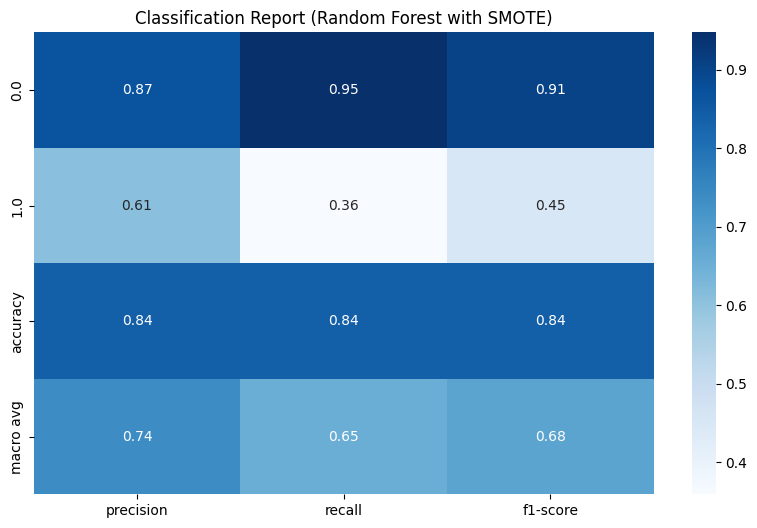

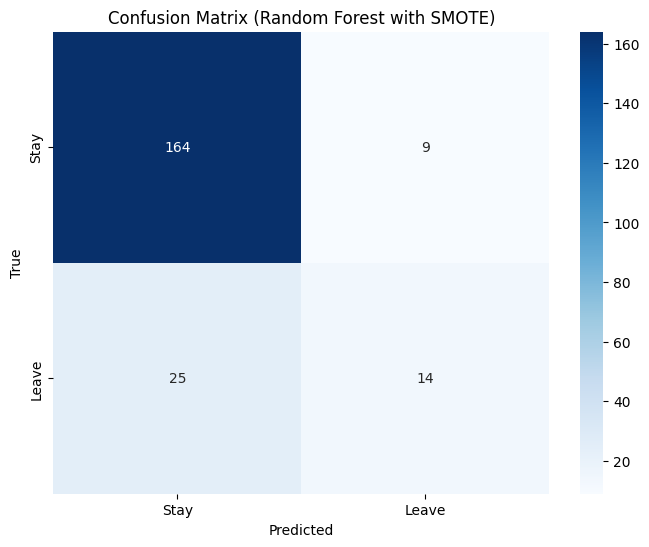

In [13]:
# Prediksi pada data test
y_pred = grid_search.best_estimator_.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi classification report
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']].iloc[:-1, :], annot=True, cmap="Blues", fmt=".2f")
plt.title('Classification Report (Random Forest with SMOTE)')
plt.show()

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.title('Confusion Matrix (Random Forest with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Dari confusion matrix, kita dapat melihat bahwa:

True Negatives (TN): 164 karyawan yang sebenarnya Stay, tetapi diprediksi Stay dengan benar.

False Positives (FP): 9 karyawan yang sebenarnya Stay, tetapi diprediksi keluar (Leave).

False Negatives (FN): 25 karyawan yang sebenarnya keluar, tetapi diprediksi tetap (Stay).

True Positives (TP): 14 karyawan yang sebenarnya keluar, dan diprediksi keluar dengan benar.



Model menunjukkan kinerja yang sangat baik dalam memprediksi karyawan yang Stay, dengan precision dan recall yang tinggi. Namun, model mengalami kesulitan dalam memprediksi karyawan yang akan Leave.

Recall untuk kelas Leave yang rendah (36%) menunjukkan bahwa model gagal mendeteksi sebagian besar karyawan yang memiliki kemungkinan keluar. Ini mungkin disebabkan oleh ketidakseimbangan kelas (lebih banyak karyawan Stay daripada Leave).

Meskipun akurasi model terlihat tinggi, model kurang sensitif terhadap prediksi karyawan yang akan keluar (Leave), yang penting untuk analisis attrition dalam konteks HR.